In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import numpy as np
import sys
sys.path.insert(0, '../Resources')
import MyFunctionsV4 as mfs

In [2]:
player_perform_link = '../CollectedData/final_player_perform_731471.csv'
match_list_link = '../CollectedData/match_list_92820.csv'
player_perform_df = pd.read_csv(player_perform_link)
matches_df = pd.read_csv(match_list_link)

In [3]:
matches_df['winning_club_id'] = matches_df.apply(mfs.winning_club_id, axis=1)

In [4]:
merged_df = pd.merge(player_perform_df, matches_df[['game_id','winning_club_id']], on='game_id', how='left')

In [5]:
merged_df['result'] = merged_df.apply(mfs.win_loss_draw_club_assign, axis = 1)

In [6]:
merged_df = merged_df[['motm','result', 'position', 'rating',
       'goals', 'shots', 'assist', 'passes_made',
       'pass_attempts', 'pass_percent', 'tackles_made', 'tackle_attempts',
                       'red_card', 'gk_saves']]

merged_df.to_csv(f'../CollectedData/motm_merged{len(merged_df)}.csv', index=False)

In [7]:
merged_df.head(3)
merged_df = merged_df[merged_df.position != 'any']

In [8]:
numeric_columns = merged_df.select_dtypes(include='number').columns

motm = merged_df[merged_df.motm == 'Yes'].reset_index(drop=True)
motm = motm.groupby('position').mean()
motm = motm[numeric_columns]

not_motm = merged_df[merged_df.motm == 'No'].reset_index(drop=True)
not_motm = not_motm.groupby('position').mean()
not_motm = not_motm[numeric_columns]


In [9]:
motm

,rating,goals,shots,assist,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,gk_saves
position,,,,,,,,,,
defender,8.276755,0.429362,1.058841,0.299447,13.154093,16.965045,0.771328,1.883193,4.383629,0.000000
forward,8.611430,1.689190,4.201888,0.704478,12.758140,16.530203,0.773593,0.925189,4.422987,0.000000
goalkeeper,7.190000,0.054545,0.163636,0.054545,4.340909,5.804545,0.640455,0.009091,0.086364,5.518182
midfielder,8.305762,0.965489,2.386139,0.825313,16.241856,21.245278,0.757556,1.586598,5.266299,0.000000


In [10]:
not_motm

,rating,goals,shots,assist,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,gk_saves
position,,,,,,,,,,
defender,6.980382,0.049296,0.372613,0.060270,8.477485,11.026748,0.698865,1.062134,3.217438,0.000000
forward,7.222903,0.612779,2.760519,0.356115,10.168777,13.498731,0.689841,0.552018,3.998679,0.000000
goalkeeper,6.013478,0.006170,0.029562,0.012202,2.041903,3.020905,0.327169,0.007598,0.050974,2.437077
midfielder,6.964305,0.217804,1.233234,0.387572,11.721886,15.689641,0.689907,1.022410,4.628973,0.000000


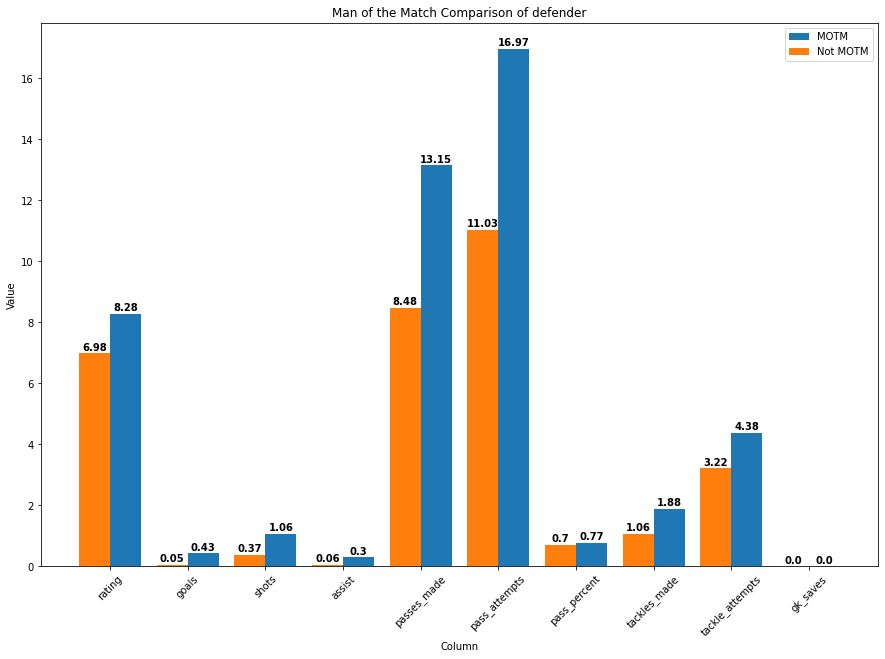

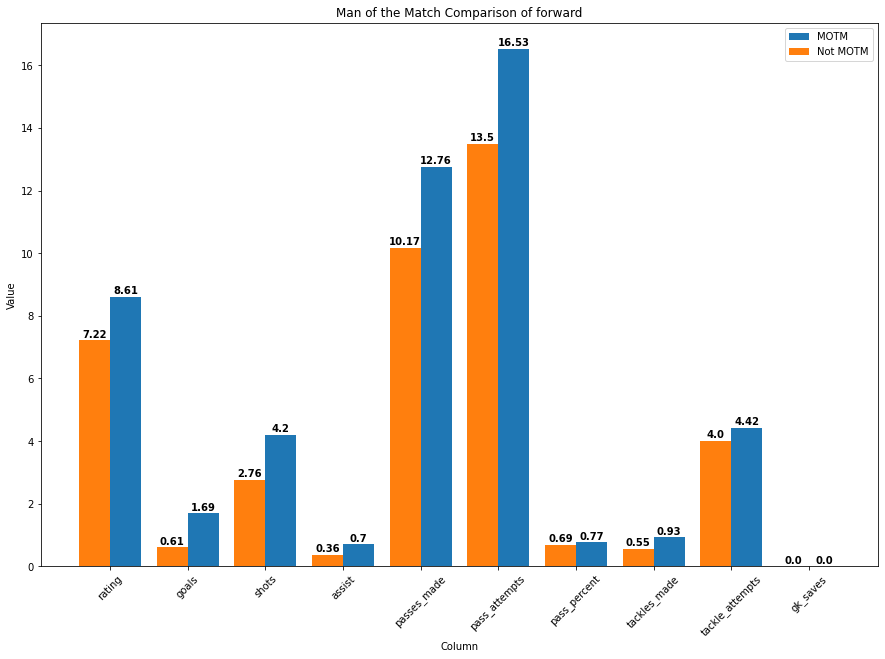

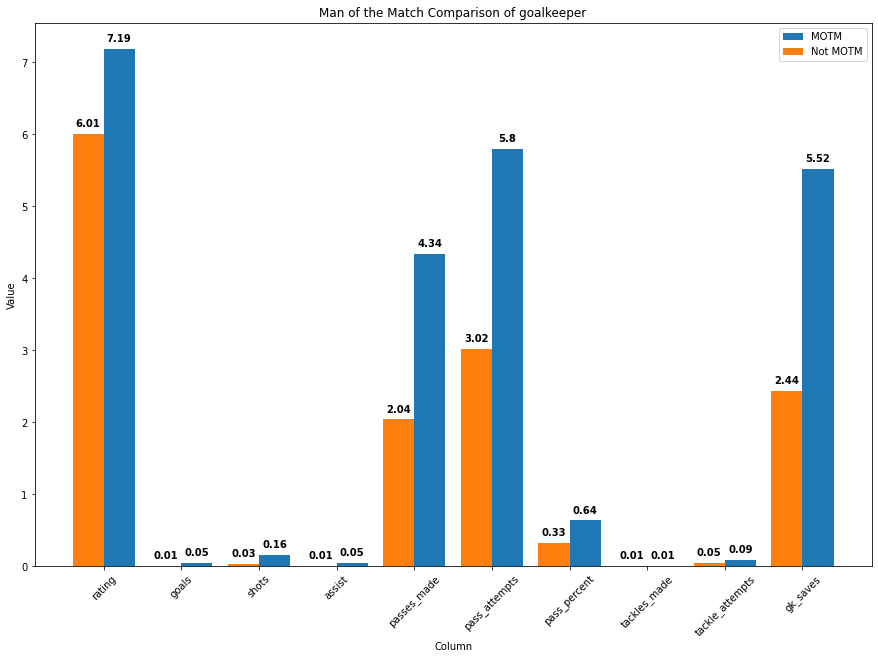

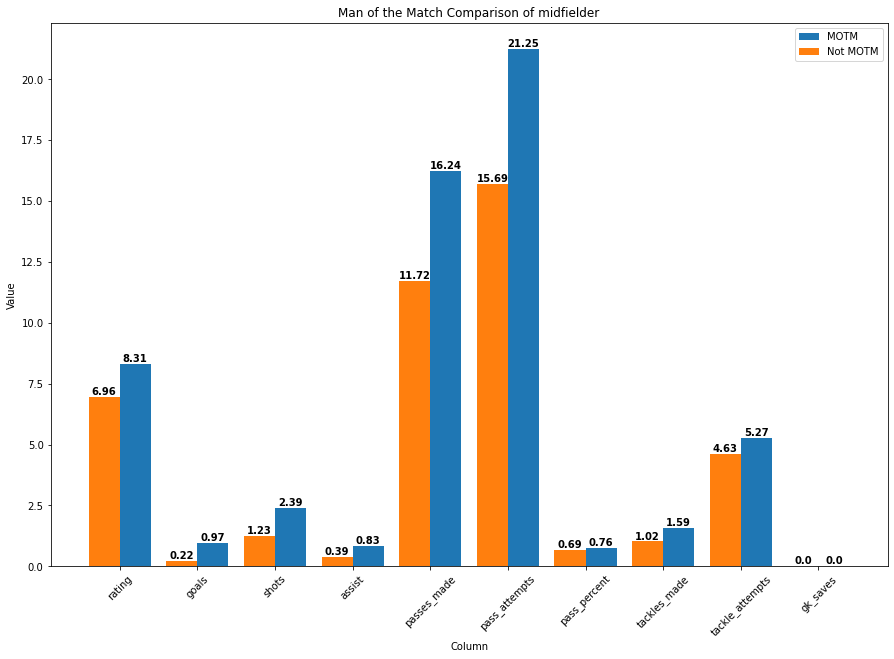

In [20]:
motm_rounded = motm.round(2)
not_motm_rounded = not_motm.round(2)


plt.rcParams['figure.figsize'] = [15, 10]
# Loop over each row of the dataframes and create a bar graph for each row
for idx in motm.index:
    fig, ax = plt.subplots()
    ax.set_title(f"Man of the Match Comparison of {idx}")
    ax.set_xlabel("Column")
    ax.set_ylabel("Value")
    
    # Get the values for the current row in each dataframe
    values1 = motm.loc[idx].values.round(2)
    values2 = not_motm.loc[idx].values.round(2)
    
    # Create a bar graph with the values for each dataframe
    ax.bar(range(len(values1)), values1, width=0.4, align='edge', label='MOTM')
    ax.bar(range(len(values2)), values2, width=-0.4, align='edge', label='Not MOTM')
    
    # Add the value above each bar
    for i, v in enumerate(values1):
        ax.text(i + 0.2, v + 0.1, str(v), color='black', fontweight='bold', ha='center')
    for i, v in enumerate(values2):
        ax.text(i - 0.2, v + 0.1, str(v), color='black', fontweight='bold', ha='center')
    
    
    # Set the xticks and xticklabels
    ax.set_xticks(range(len(motm.columns)))
    ax.set_xticklabels(not_motm.columns, rotation=45)
    
    # Add legend and show plot
    ax.legend()
    fig.patch.set_facecolor('white')
    plt.savefig(f"../Visualizations/MOTM Average {idx}.png", bbox_inches='tight', dpi=100)
    plt.show()
